# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#separating byte files and asm files 

source = 'train'
destination_1 = 'byteFiles'
destination_2 = 'asmFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination_1):
    os.makedirs(destination_1)
if not os.path.isdir(destination_2):
    os.makedirs(destination_2)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    data_files = os.listdir(source)
    for file in data_files:
        print(file)
        if (file.endswith("bytes")):
            shutil.move(source+'\\'+file,destination_1)
        if (file.endswith("asm")):
            shutil.move(source+'\\'+file,destination_2)

<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


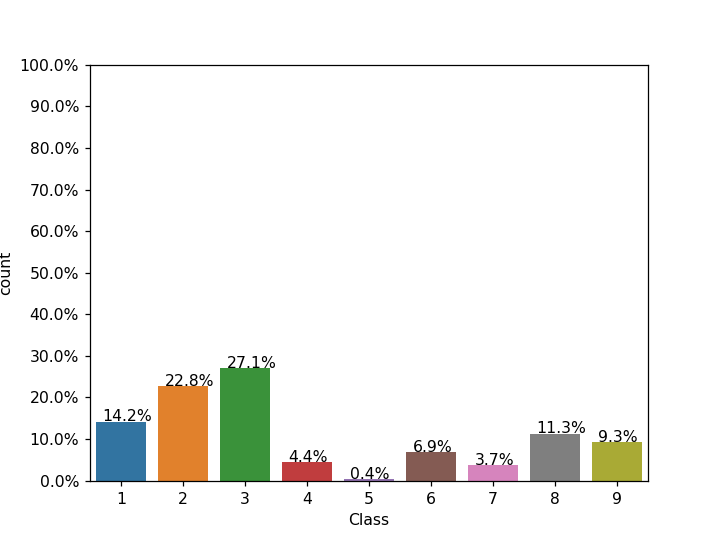

In [ ]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

# Extracting Data

In [ ]:
# !pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://storage.googleapis.com/kagglesdsdata/competitions/4117/46665/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1624347470&Signature=GQUl2zhuuCQZ%2BPWgi3aU%2FmnN8O0D0CotaTv1cGbZrbIk5dRtvlfPZ5QghWrvQUxn4%2FTMldR3zVpNE0lWZ%2BVdFaLvd4oo%2Fz%2FcrKiun28hFttE7XxEUZBtEaulT3f%2F%2FfcxCpRddkRqusTzurbCPLQdrEOzWSmiCr06Fs4PNiPqXKNxnGxR6JYyAJAdJ5vPDjtRoBrVRVFeW5OIQeAL12uHFQ5PVQyWwwXenyPbAffwruKcYzf2KuPzmnMOrsQlBNuYHBlUCcvug6gwV7giqGc6iFt1Chw0QDDmw9bOCoMgtfNl9cwMDTGbQZYwwYHy27uaje9u%2BqGaHQNx0aoIq5fElw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.7z')

  0%|          | 0/18810691091 [00:00<?, ?it/s]

18810691584it [03:10, 194416833.61it/s]                                 

# Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
import pandas as pd
import array as arr
import joblib
# import nltk
# from nltk import word_tokenize 
# from nltk.util import ngrams
# nltk.download('punkt')

# Distribution of malware classes in whole data set

<IPython.core.display.Javascript object>


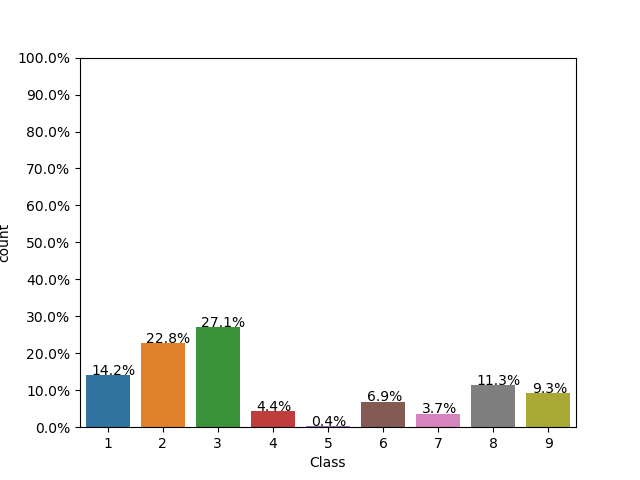

In [ ]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

# Extracting Bytefiles

In [ ]:
start=datetime.now()
# p
!7z e train.7z -o/home/gujaraditya9623/bytefiles *.bytes -r

end=datetime.now()
difference=end-start
print('Time taken to extract all the byte files',difference)

NameError: name 'p' is not defined

## Extracting bi-gram feature from bytefiles

In [ ]:
from tqdm import tqdm
files = os.listdir('bytefiles')
filenames=[]
array=[]
bigram_string=[]
bigrams=[]
start=datetime.now()
corpus=[]
pro_text=[]
for file in tqdm(files):
  if(file.endswith("bytes")):
    file=file.split('.')[0]
    with open('bytefiles/'+file+'.bytes',"r") as fp:
      text=fp.read()
      text=text.split('\n')
      string=''
      for line in text:
        if line != '':
          a=line.split(" ")[1:]
          t=' '.join(a)
          string+=t+' '
      corpus.append([string])
      pro_text.append(string)
end=datetime.now()
difference=end-start
print('Time taken to extract bigrams',difference)

100%|██████████| 10868/10868 [38:58<00:00,  4.65it/s]

Time taken to extract bigrams 0:38:58.504874


## Saving results, vocab

In [ ]:
import pickle
with open('pro_text.ob', 'wb') as fp:
    pickle.dump(pro_text, fp)

In [ ]:
with open('corpus.ob', 'wb') as fp:
    pickle.dump(corpus, fp)

In [ ]:
import pickle
with open('vocab.ob', 'wb') as fp:
    pickle.dump(vocab, fp)

In [ ]:
with open ('pro_text.ob', 'rb') as fp:
    pro_text = pickle.load(fp)


In [ ]:

start=datetime.now()
vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2),token_pattern = '[a-zA-Z0-9$&+,:;=?@#|<>.^*()%!-]+',lowercase=False)
vectorizer.fit(pro_text)
vocab=vectorizer.get_feature_names()
end=datetime.now()
difference=end-start
print('Time taken to extract bigrams',difference)

Time taken to extract bigrams 3:12:39.480660


In [ ]:
with open ('corpus.ob', 'rb') as fp:
    corpus = pickle.load(fp)


In [ ]:
with open ('vocab.ob', 'rb') as fp:
    vocab = pickle.load(fp)


In [ ]:
len(vocab)

66049

In [ ]:
import math
math.sqrt(len(vocab))

257.0

In [ ]:
len(corpus)

10868

## Obtain matrix & converting to Dataframe

In [ ]:
start=datetime.now()
matrix=csr_matrix((len(corpus),len(vocab)), dtype=np.int8).toarray()
for i,cor in enumerate(tqdm(corpus)):
  vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2),token_pattern = '[a-zA-Z0-9$&+,:;=?@#|<>.^*()%!-]+',lowercase=False,vocabulary=vocab)
  matrix[i,:]=vectorizer.fit_transform(cor).toarray()
end=datetime.now()
difference=end-start
print('Time taken to extract bigrams',difference)

100%|██████████| 10868/10868 [3:37:00<00:00,  1.20s/it] 

Time taken to extract bigrams 3:37:00.472724


In [ ]:
df=pd.DataFrame(matrix,columns=vocab)

In [ ]:
# df.to_csv('malware_df.csv')

In [ ]:
df.head()

00 00  00 01  00 02  00 03  00 04  00 05  00 06  00 07  00 08  00 09  ...  \
0    -27     16      6     13     13     16     15     11      9     13  ...   
1     48    -10    119     87    -54    113   -120    -20     23    -32  ...   
2     57     40     12      5      4      2      1      6      9      7  ...   
3    -13     43    -30    -58    -66     11      5      3    -13     11  ...   
4    123    120    -91    104    115    -94    104    120      2     12  ...   

   FF F6  FF F7  FF F8  FF F9  FF FA  FF FB  FF FC  FF FD  FF FE  FF FF  
0     11     20     13     12     13     14     13     11     13     65  
1   -120     73    -87    122    104     94   -118    125    -97    -77  
2      1      0      1      1      3      2      2      0      2     55  
3      1      4    -80      0      0      1    -45      3     11     39  
4      6     12     18     10      8      8      6      9      7    103  

[5 rows x 66049 columns]

## Extract and process data from saved Dataframe

In [ ]:
dataf=pd.read_csv('malware_df.csv')
# dataf.head()

In [ ]:
dataf=dataf.drop(['Unnamed: 0'], axis=1)
dataf.head()

00 00  00 01  00 02  00 03  00 04  00 05  00 06  00 07  00 08  00 09  ...  \
0    -27     16      6     13     13     16     15     11      9     13  ...   
1     48    -10    119     87    -54    113   -120    -20     23    -32  ...   
2     57     40     12      5      4      2      1      6      9      7  ...   
3    -13     43    -30    -58    -66     11      5      3    -13     11  ...   
4    123    120    -91    104    115    -94    104    120      2     12  ...   

   FF F6  FF F7  FF F8  FF F9  FF FA  FF FB  FF FC  FF FD  FF FE  FF FF  
0     11     20     13     12     13     14     13     11     13     65  
1   -120     73    -87    122    104     94   -118    125    -97    -77  
2      1      0      1      1      3      2      2      0      2     55  
3      1      4    -80      0      0      1    -45      3     11     39  
4      6     12     18     10      8      8      6      9      7    103  

[5 rows x 66049 columns]

In [ ]:
datac=dataf.iloc[:,:2000]
datac.head()

00 00  00 01  00 02  00 03  00 04  00 05  00 06  00 07  00 08  00 09  ...  \
0    -27     16      6     13     13     16     15     11      9     13  ...   
1     48    -10    119     87    -54    113   -120    -20     23    -32  ...   
2     57     40     12      5      4      2      1      6      9      7  ...   
3    -13     43    -30    -58    -66     11      5      3    -13     11  ...   
4    123    120    -91    104    115    -94    104    120      2     12  ...   

   07 BE  07 BF  07 C0  07 C1  07 C2  07 C3  07 C4  07 C5  07 C6  07 C7  
0     12      8     10     10     13      7      9     13     11      9  
1     13      9     37     21     15     30     18      9     22     14  
2      1      2      2      0      2      0      1      0      1      2  
3      1      0      0      2      0      1      0      0      0      2  
4     11      5      3      5      7      4      4     10      5      6  

[5 rows x 2000 columns]

In [ ]:
result_df=pd.read_csv('result_with_size.csv')

In [ ]:

# dataf['size']=result_df['size']
result_df=result_df.drop(['Unnamed: 0'], axis=1)
dataf.insert(loc=0, column='ID', value=result_df['ID'])


In [ ]:
result_df.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...    f9    fa    fb    fc    fd     fe     ff     ??      size  \
0  2965  ...  3101  3211  3097  2758  3099   2759   5753   1824  4.234863   
1  9291  ...   439   281   302  7639   518  17001  54902   8588  5.538818   
2  9107  ...  2242  2885  2863  2471  2786   2680  49144    468  3.887939   
3  1078  ...   485   462   516  1133   471    761   7998  13940  0.574219   
4   422  ...   350   209   239   653   221    242   2199   9008  0.370850   

   Class  
0      9  
1      2  
2      9  
3      1  
4      8  

[5 rows x 260 columns]

## Merge Unigram and Bigram features

In [ ]:
unibi_gram_df=dataf.merge(result_df, on='ID').drop(['ID','Class'], axis=1)
# unibi_gram_df=result_df.merge(dataf, on='ID').drop(['ID','Class'], axis=1)
unibi_gram_df.shape

(10868, 66307)

In [ ]:
unibi_gram_df.head()

00 00  00 01  00 02  00 03  00 04  00 05  00 06  00 07  00 08  00 09  ...  \
0    -27     16      6     13     13     16     15     11      9     13  ...   
1     48    -10    119     87    -54    113   -120    -20     23    -32  ...   
2     57     40     12      5      4      2      1      6      9      7  ...   
3    -13     43    -30    -58    -66     11      5      3    -13     11  ...   
4    123    120    -91    104    115    -94    104    120      2     12  ...   

     f8    f9    fa    fb    fc    fd     fe     ff     ??      size  
0  3687  3101  3211  3097  2758  3099   2759   5753   1824  4.234863  
1  6536   439   281   302  7639   518  17001  54902   8588  5.538818  
2  2358  2242  2885  2863  2471  2786   2680  49144    468  3.887939  
3   873   485   462   516  1133   471    761   7998  13940  0.574219  
4   947   350   209   239   653   221    242   2199   9008  0.370850  

[5 rows x 66307 columns]

## Normalize byte feature Dataframe

In [ ]:
def normalize(df):
    x = df.values 
    col=df.columns
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    norm_data = pd.DataFrame(x_scaled,columns=col)
    return norm_data


In [ ]:
byte_data_norm=normalize(unibi_gram_df)
byte_data_norm.insert(loc=0, column='ID', value=result_df['ID'])
byte_data_norm['Class']=result_df['Class']
byte_data_norm.head()

ID     00 00     00 01     00 02     00 03     00 04  \
0  01azqd4InC7m9JpocGv5  0.396078  0.564706  0.525490  0.552941  0.552941   
1  01IsoiSMh5gxyDYTl4CB  0.690196  0.462745  0.968627  0.843137  0.290196   
2  01jsnpXSAlgw6aPeDxrU  0.725490  0.658824  0.549020  0.521569  0.517647   
3  01kcPWA9K2BOxQeS5Rju  0.450980  0.670588  0.384314  0.274510  0.243137   
4  01SuzwMJEIXsK7A8dQbl  0.984314  0.972549  0.145098  0.909804  0.952941   

      00 05     00 06     00 07     00 08  ...        f9        fa        fb  \
0  0.564706  0.560784  0.545098  0.537255  ...  0.013560  0.013107  0.013634   
1  0.945098  0.031373  0.423529  0.592157  ...  0.001920  0.001147  0.001329   
2  0.509804  0.505882  0.525490  0.537255  ...  0.009804  0.011777  0.012604   
3  0.545098  0.521569  0.513725  0.450980  ...  0.002121  0.001886  0.002272   
4  0.133333  0.909804  0.972549  0.509804  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 66309 columns]

### Data for final merge

In [ ]:
datac.insert(loc=0, column='ID', value=result_df['ID'])
unibi_gram_df_c=datac.merge(result_df, on='ID').drop(['ID','Class'], axis=1)
# unibi_gram_df=result_df.merge(dataf, on='ID').drop(['ID','Class'], axis=1)
unibi_gram_df_c.shape

(10868, 2258)

In [ ]:
byte_data_norm_c=normalize(unibi_gram_df_c)
byte_data_norm_c.insert(loc=0, column='ID', value=result_df['ID'])
byte_data_norm_c['Class']=result_df['Class']
byte_data_norm_c.head()

ID     00 00     00 01     00 02     00 03     00 04  \
0  01azqd4InC7m9JpocGv5  0.396078  0.564706  0.525490  0.552941  0.552941   
1  01IsoiSMh5gxyDYTl4CB  0.690196  0.462745  0.968627  0.843137  0.290196   
2  01jsnpXSAlgw6aPeDxrU  0.725490  0.658824  0.549020  0.521569  0.517647   
3  01kcPWA9K2BOxQeS5Rju  0.450980  0.670588  0.384314  0.274510  0.243137   
4  01SuzwMJEIXsK7A8dQbl  0.984314  0.972549  0.145098  0.909804  0.952941   

      00 05     00 06     00 07     00 08  ...        f9        fa        fb  \
0  0.564706  0.560784  0.545098  0.537255  ...  0.013560  0.013107  0.013634   
1  0.945098  0.031373  0.423529  0.592157  ...  0.001920  0.001147  0.001329   
2  0.509804  0.505882  0.525490  0.537255  ...  0.009804  0.011777  0.012604   
3  0.545098  0.521569  0.513725  0.450980  ...  0.002121  0.001886  0.002272   
4  0.133333  0.909804  0.972549  0.509804  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 2260 columns]

In [ ]:
data_y = byte_data_norm['Class']

In [ ]:
data_y.shape

(10868,)

## Multivariate Analysis

<IPython.core.display.Javascript object>


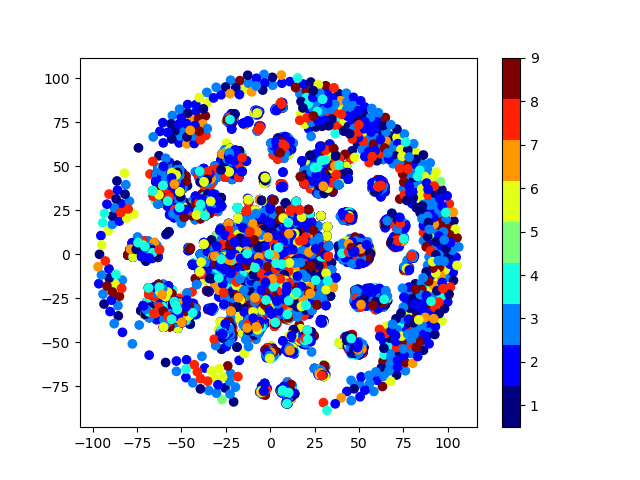

In [ ]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(byte_data_norm.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [ ]:
data_y = byte_data_norm['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(byte_data_norm.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [ ]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


In [ ]:
X_train.head()

00 00     00 01     00 02     00 03     00 04     00 05     00 06  \
1330   0.674510  0.082353  0.686275  0.764706  0.705882  0.698039  0.658824   
10117  0.403922  0.141176  0.760784  0.764706  0.952941  0.890196  0.870588   
4081   0.600000  0.203922  0.615686  0.760784  0.823529  0.301961  0.537255   
9927   0.121569  0.752941  0.650980  0.529412  0.521569  0.513725  0.529412   
3750   0.352941  0.843137  0.196078  0.145098  0.713725  0.807843  0.552941   

          00 07     00 08     00 09  ...        f8        f9        fa  \
1330   0.733333  0.631373  0.607843  ...  0.003093  0.002081  0.001559   
10117  0.717647  0.894118  0.878431  ...  0.017412  0.014023  0.013230   
4081   0.372549  0.709804  0.564706  ...  0.016806  0.014211  0.013083   
9927   0.709804  0.552941  0.517647  ...  0.003114  0.001640  0.001621   
3750   0.027451  0.266667  0.835294  ...  0.005140  0.002514  0.002372   

             fb        fc        fd        fe        ff        ??      size  
1330   0.001880  0.005383  0.001742  0.002533  0.002918  0.000128  0.014486  
10117  0.013603  0.037222  0.014896  0.016532  0.009259  0.105697  0.150520  
4081   0.014197  0.036095  0.015535  0.016865  0.009767  0.105191  0.150254  
9927   0.001633  0.006257  0.001634  0.002200  0.002667  0.000114  0.012888  
3750   0.002549  0.008972  0.002540  0.003079  0.012052  0.000018  0.021141  

[5 rows x 66307 columns]

In [ ]:
y_train.head()

1330     9
10117    3
4081     3
9927     9
3750     8
Name: Class, dtype: int64

## Distribution of classes in train, test and validation data

<IPython.core.display.Javascript object>


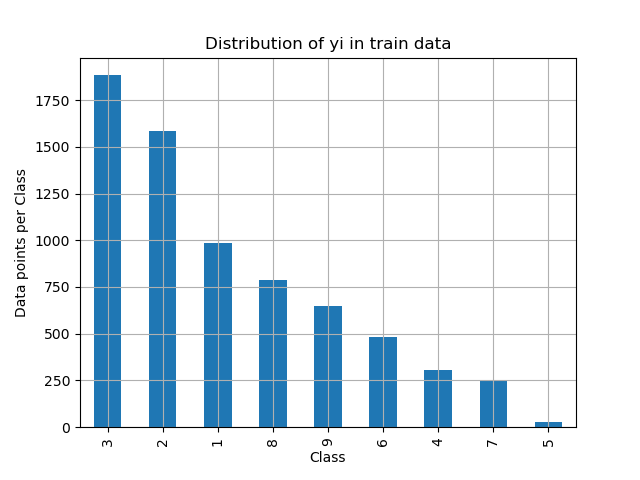

Number of data points in class 1 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 3 : 986 ( 14.177 %)
Number of data points in class 4 : 786 ( 11.301 %)
Number of data points in class 5 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 7 : 304 ( 4.371 %)
Number of data points in class 8 : 254 ( 3.652 %)
Number of data points in class 9 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


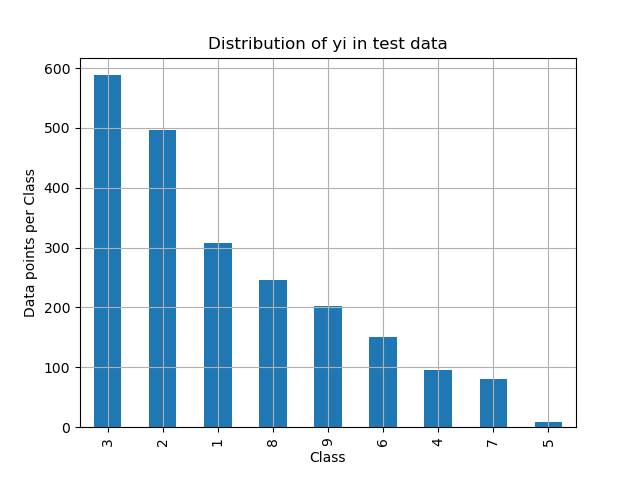

Number of data points in class 1 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 3 : 308 ( 14.167 %)
Number of data points in class 4 : 246 ( 11.316 %)
Number of data points in class 5 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 7 : 95 ( 4.37 %)
Number of data points in class 8 : 80 ( 3.68 %)
Number of data points in class 9 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


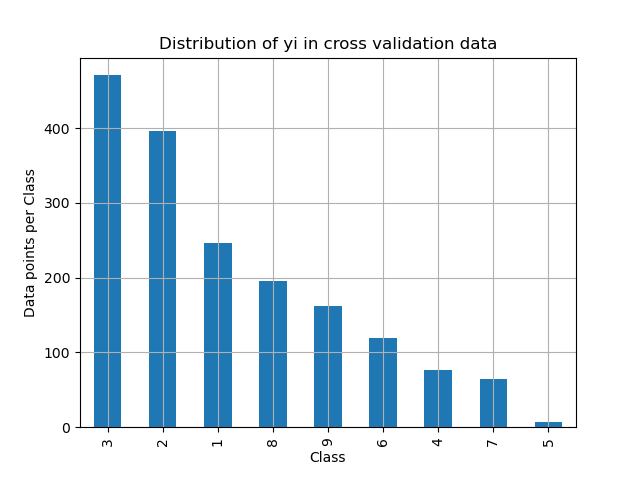

Number of data points in class 1 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 3 : 247 ( 14.204 %)
Number of data points in class 4 : 196 ( 11.271 %)
Number of data points in class 5 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 7 : 76 ( 4.37 %)
Number of data points in class 8 : 64 ( 3.68 %)
Number of data points in class 9 : 7 ( 0.403 %)


In [ ]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts()#.sortlevel()
test_class_distribution = y_test.value_counts()#.sortlevel()
cv_class_distribution = y_cv.value_counts()#.sortlevel()

# my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')#, color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
# my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')#, color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
# my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')#, color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

# Machine Leaning Models on bytes files

## 1. Random Model

Log loss on Cross Validation Data using Random Model 2.511249573248535
Log loss on Test Data using Random Model 2.4570277049589433
Number of misclassified points  88.73045078196871
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


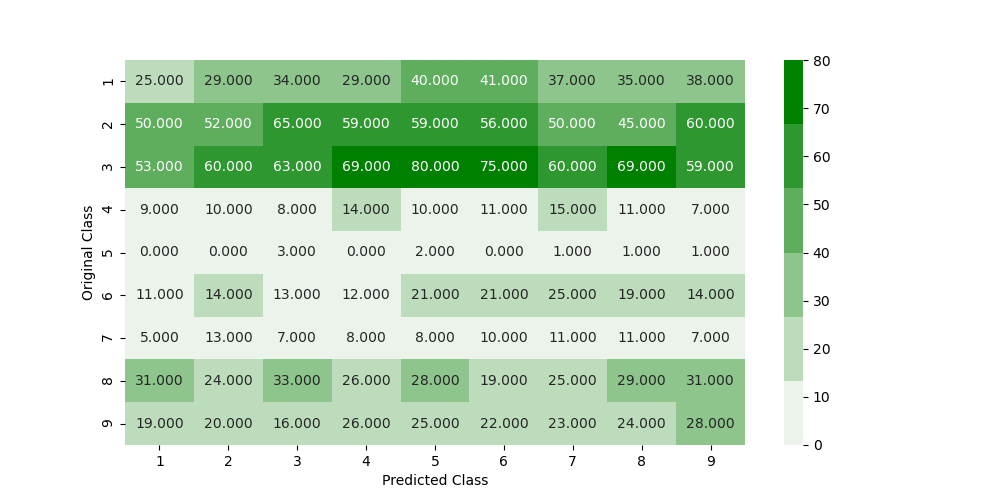

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


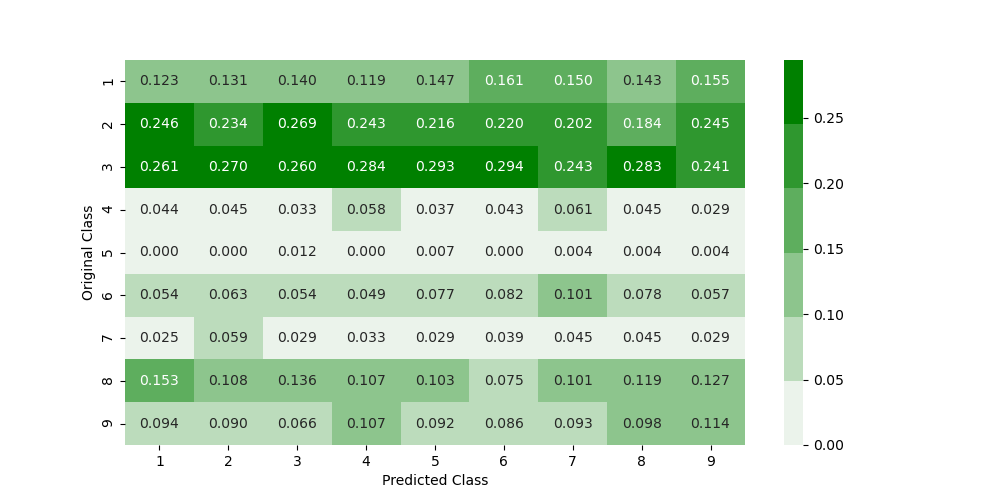

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


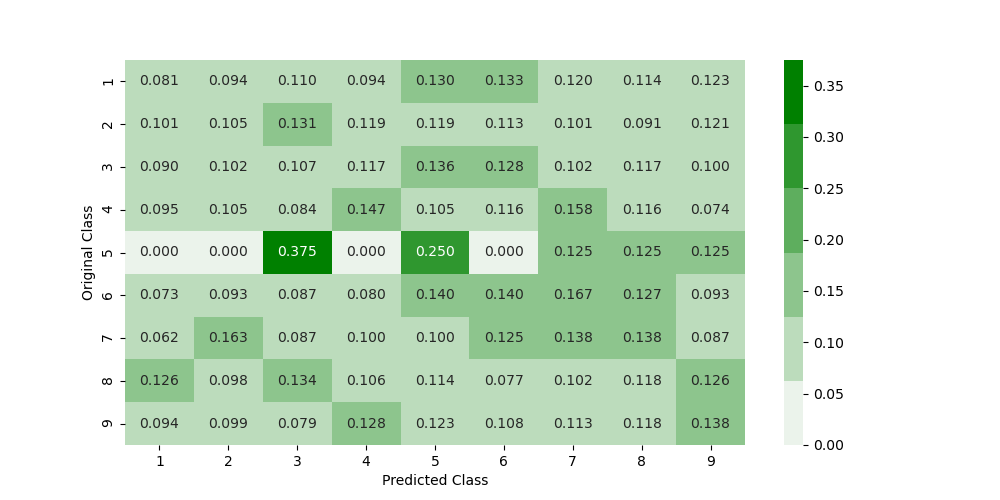

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

## 2. K Nearest Neighbour Classification

log_loss for k =  1 is 27.448297284512126
log_loss for k =  3 is 19.582374732520204
log_loss for k =  5 is 14.092325254846859
log_loss for k =  7 is 11.456002511852777
log_loss for k =  9 is 9.312831644676793
log_loss for k =  11 is 7.712722574857275
log_loss for k =  13 is 6.292794881961417
log_loss for k =  15 is 5.469868046838338
log_loss for k =  17 is 4.961748559914598
log_loss for k =  19 is 4.5083688868872995
log_loss for k =  21 is 4.072110933165797
log_loss for k =  23 is 3.6414404169087153


<IPython.core.display.Javascript object>


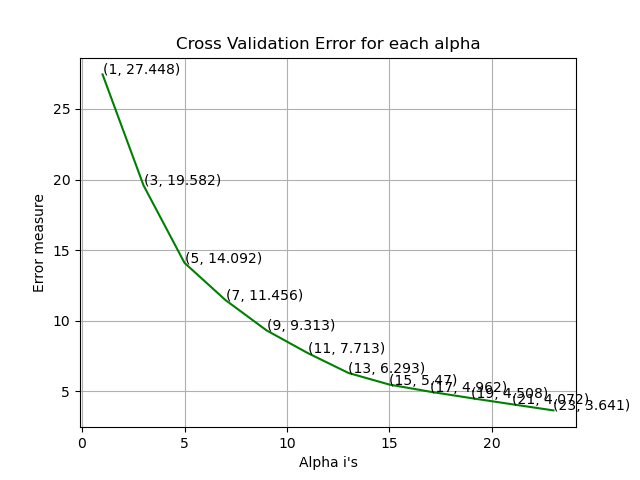

For values of best alpha =  23 The train log loss is: 1.6988070532698996
For values of best alpha =  23 The cross validation log loss is: 3.6414404169087153
For values of best alpha =  23 The test log loss is: 3.5822756080144327
Number of misclassified points  72.58509659613615
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


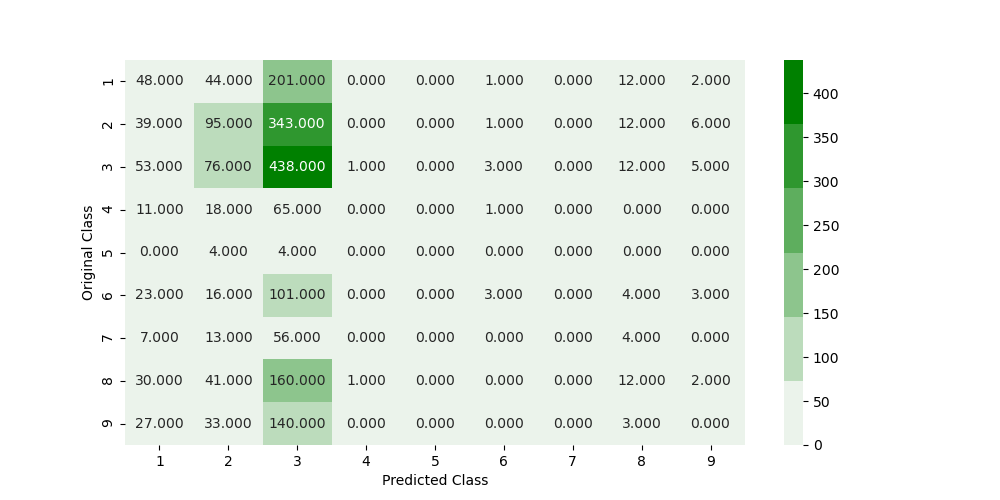

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


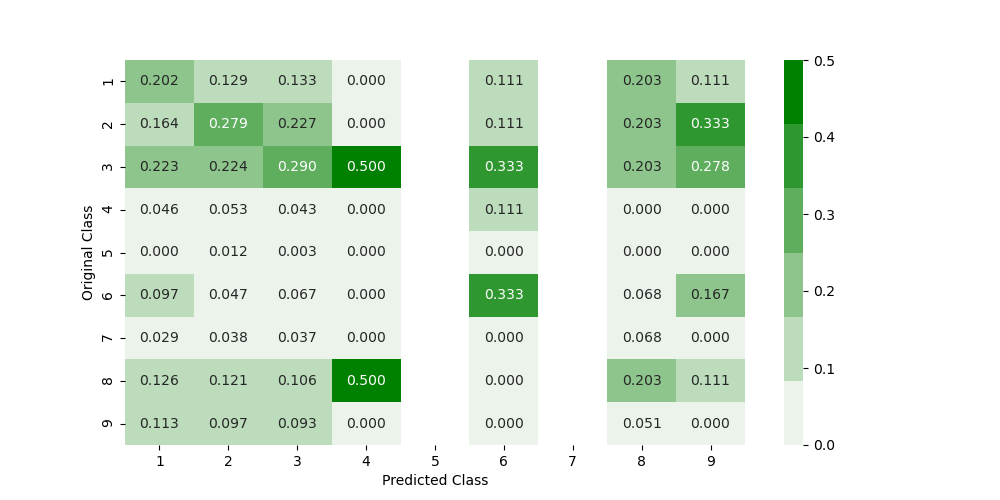

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1. nan  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


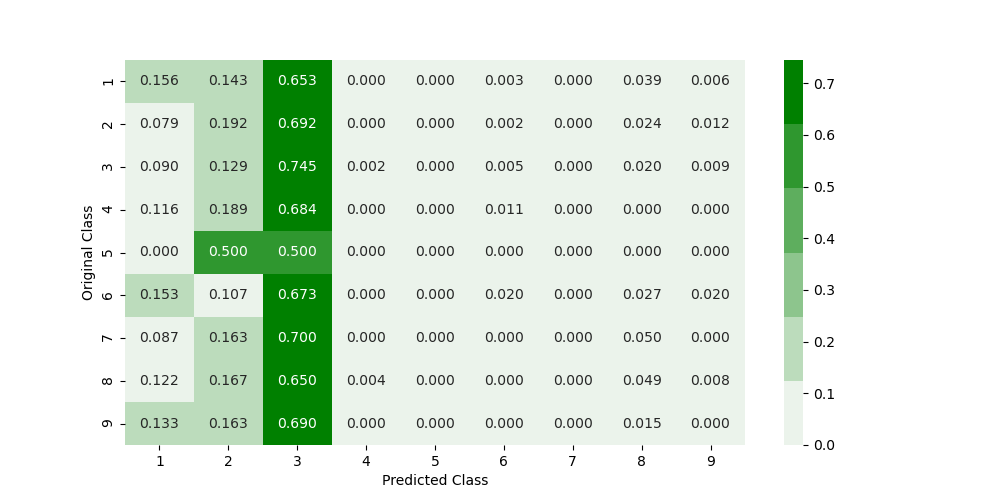

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha = [x for x in range(1, 25, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
#     sig_clf = CalibratedClassifierCV(k_cfl, method="softmax")
#     sig_clf.fit(X_train, y_train)
    predict_y = k_cfl.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
# sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
# sig_clf.fit(X_train, y_train)
    
predict_y = k_cfl.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = k_cfl.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = k_cfl.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, k_cfl.predict(X_test))

## 3. Logistic Regression

log_loss for c =  1e-05 is 2.1962005434286667
log_loss for c =  0.0001 is 2.1926370851554933
log_loss for c =  0.001 is 2.145639565835349
log_loss for c =  0.01 is 2.0451761431172653
log_loss for c =  0.1 is 2.0628931247772235
log_loss for c =  1 is 2.08949177292701
log_loss for c =  10 is 2.1911697194984647
log_loss for c =  100 is 2.0986603480914896
log_loss for c =  1000 is 2.1843029645925687


<IPython.core.display.Javascript object>


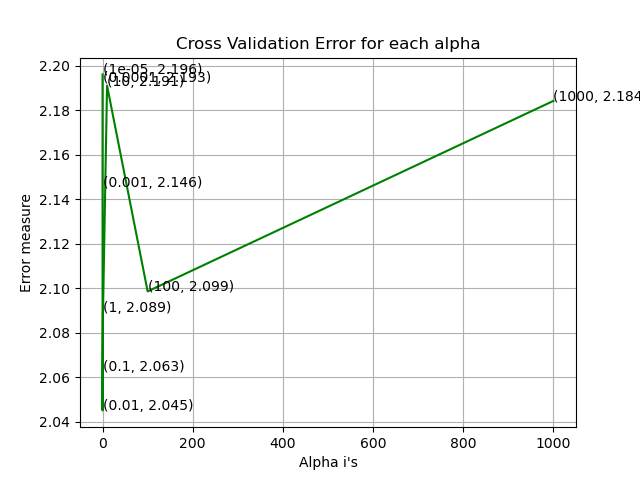

log loss for train data 1.8368429417971577
log loss for cv data 2.0451761431172653
log loss for test data 2.0534063838674332
Number of misclassified points  74.05703771849126
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


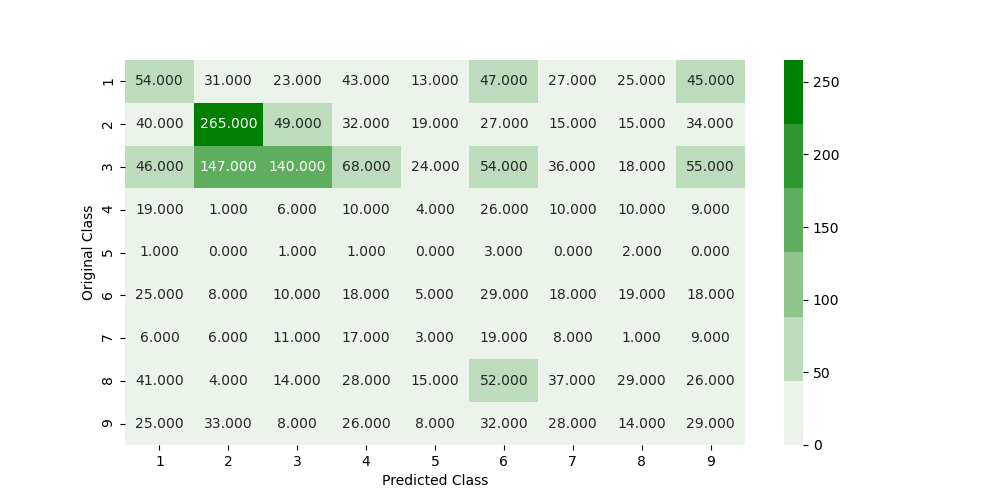

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


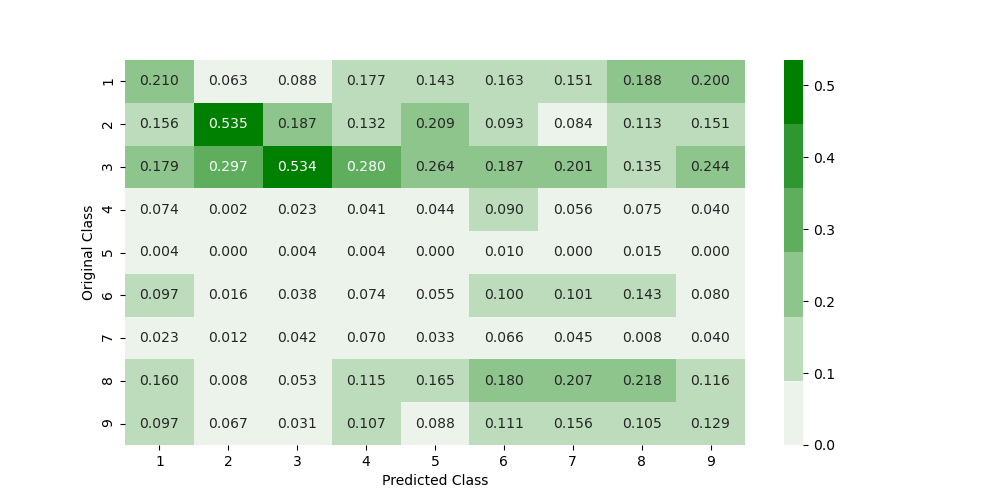

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


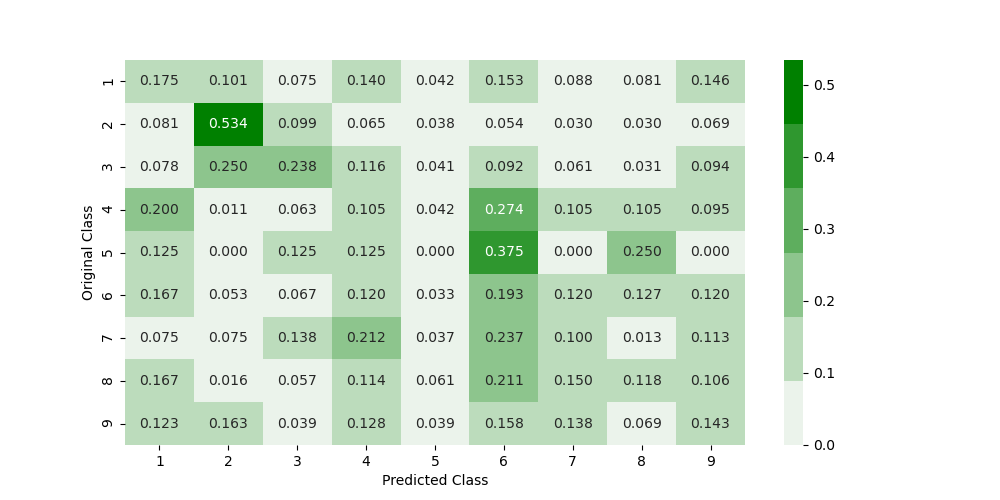

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
#     sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
#     sig_clf.fit(X_train, y_train)
    predict_y = logisticR.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
# sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
# sig_clf.fit(X_train, y_train)
pred_y=logisticR.predict(X_test)

predict_y = logisticR.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = logisticR.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = logisticR.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, logisticR.predict(X_test))

## 4. XGBoost Classifier with best hyperparameter(here considering only best hyperparameter, as XGBClassifier takes hours to train)

In [ ]:
start=datetime.now()
x_cfl=XGBClassifier(n_estimators=1000, learning_rate=0.05, colsample_bytree=1, max_depth=3,objective='multi:softmax')
x_cfl.fit(X_train,y_train)
end=datetime.now()
difference=end-start
print('Time taken to extract bigrams',difference)
# c_cfl=CalibratedClassifierCV(x_cfl,method='softmax')
# c_cfl.fit(X_train[:80],y_train[:80])


Time taken to extract bigrams 17:34:37.176576


In [ ]:
print('Time taken to train byte files with XGBClassifier is 17:34:37.176576')

Time taken to train byte files with XGBClassifier is 17:34:37.176576


### Load model from saved file

In [ ]:
# from sklearn.externals import joblib
# joblib.dump(x_cfl,'xgbmodel.pkl')


['xgbmodel.pkl']

In [ ]:
x_cfl=joblib.load('xgbmodel.pkl')

In [ ]:
predict_y = x_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = x_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = x_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))


train loss 0.0218125964777371
cv loss 0.025445828480791934
test loss 0.028990130085575928


Number of misclassified points  0.6439742410303588
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


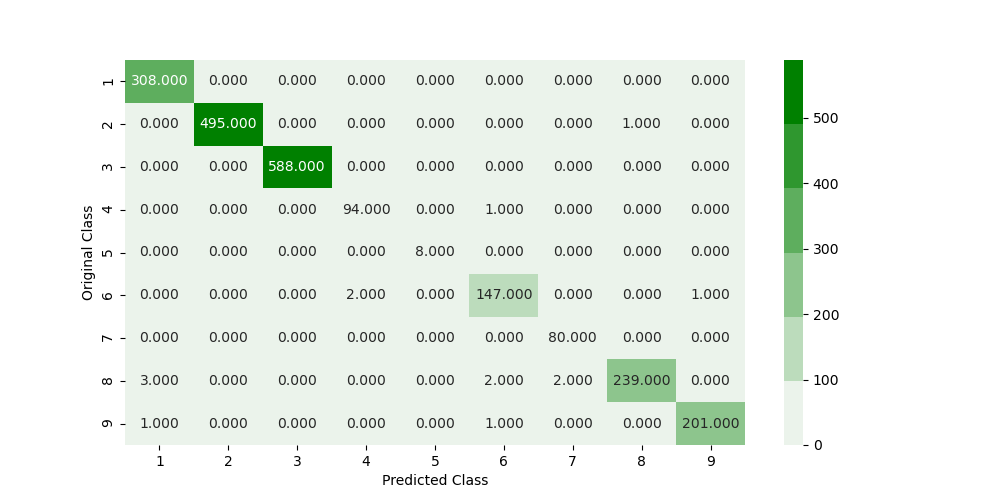

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


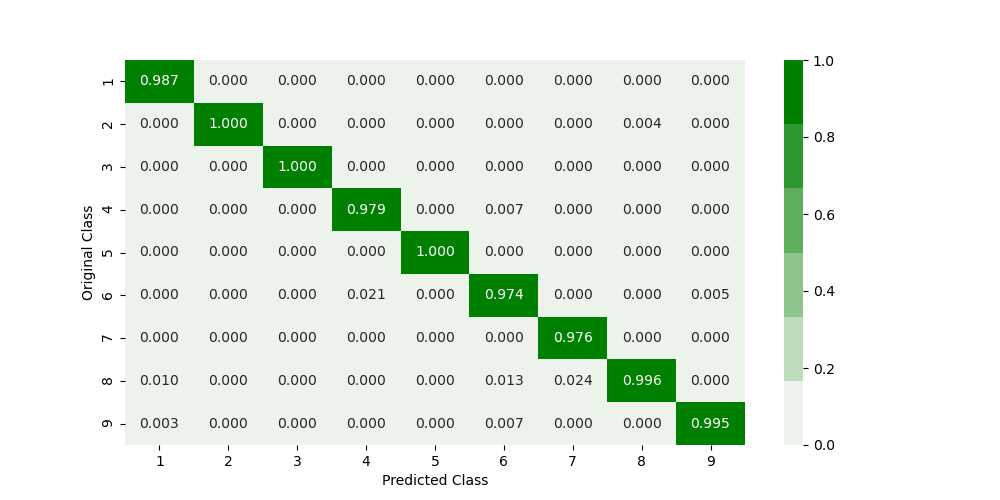

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


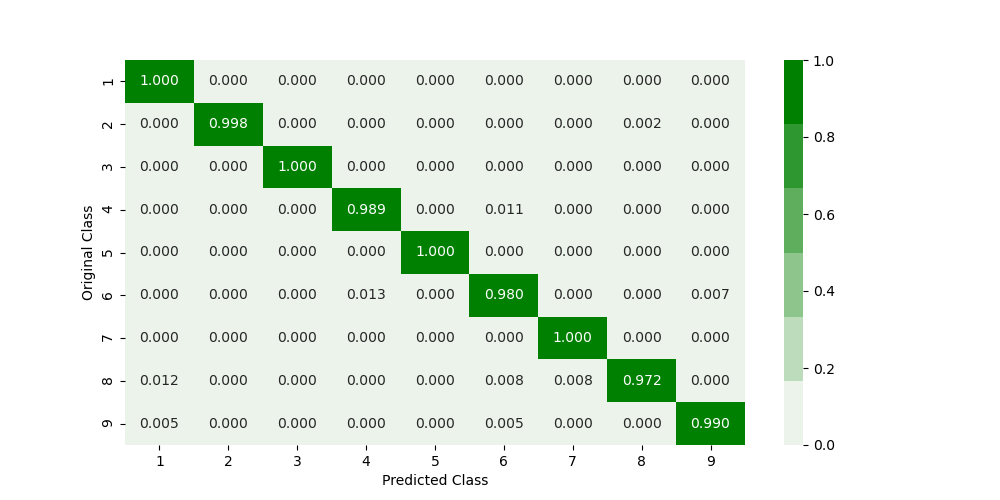

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test, x_cfl.predict(X_test))

# Modeling with .asm files

## Extracting asm files

In [ ]:
data=!7z l train.7z
print(len(data))
print(type(data))

21759
<class 'IPython.utils.text.SList'>


In [ ]:
byte_file_list=[]
asm_file_list=[]
for i in data:
  if (i.endswith("bytes")):
    byte_file_list.append(i)
  elif (i.endswith("asm")):
    asm_file_list.append(i)

In [ ]:
len(asm_file_list)

10868

In [ ]:
# Finding only the file names of ASM files and storing the file names in an array
asm_file_name=[]
for i in range(0,len(asm_file_list)):
  asm_file_name.append(asm_file_list[i].split()[-1].replace('train/', ''))

In [ ]:
asm_file_name[:5]

['01azqd4InC7m9JpocGv5.asm',
 '01IsoiSMh5gxyDYTl4CB.asm',
 '01jsnpXSAlgw6aPeDxrU.asm',
 '01kcPWA9K2BOxQeS5Rju.asm',
 '01SuzwMJEIXsK7A8dQbl.asm']

## Splitting data into batches and saving each batch of pixel intensiy features

In [ ]:
batches=np.array_split(asm_file_name,10)

In [ ]:
start=datetime.now()
asm_matrix=np.zeros((len(batches[9]),800))
for i,file in enumerate(tqdm(batches[9])):
  # start=datetime.now()
  !7z e train.7z -o/home/gujaraditya9623/asmbatch *$file -r
  f=open('/home/gujaraditya9623/asmbatch/'+file,'rb')
  asm_arr=arr.array('B')
  asm_arr.frombytes(f.read())
  f.close()
  asm_matrix[i,:]=asm_arr[:800]
  f.close()
  os.remove('/home/gujaraditya9623/asmbatch/'+file)
end=datetime.now()
difference=end-start
print('Time taken to extract',difference)

NameError: name 'batches' is not defined

In [ ]:
batch_df=pd.DataFrame(asm_matrix)
batch_df.to_csv('/home/gujaraditya9623/batches/batch9.csv')

In [ ]:
b_df=pd.read_csv('batches/batch9.csv')
b_df.head()

Unnamed: 0     0     1     2     3     4     5     6     7     8  ...  \
0           0  72.0  69.0  65.0  68.0  69.0  82.0  58.0  48.0  48.0  ...   
1           1  72.0  69.0  65.0  68.0  69.0  82.0  58.0  48.0  48.0  ...   
2           2  72.0  69.0  65.0  68.0  69.0  82.0  58.0  48.0  48.0  ...   
3           3  72.0  69.0  65.0  68.0  69.0  82.0  58.0  48.0  48.0  ...   
4           4  72.0  69.0  65.0  68.0  69.0  82.0  58.0  48.0  48.0  ...   

     790    791    792    793    794   795    796    797   798    799  
0   10.0   72.0   69.0   65.0   68.0  69.0   82.0   58.0  48.0   48.0  
1  109.0  111.0  100.0  101.0  108.0  32.0  102.0  108.0  97.0  116.0  
2  109.0  111.0  100.0  101.0  108.0  32.0  102.0  108.0  97.0  116.0  
3   61.0   61.0   61.0   61.0   61.0  61.0   61.0   61.0  61.0   61.0  
4   61.0   61.0   61.0   61.0   61.0  61.0   61.0   61.0  61.0   61.0  

[5 rows x 801 columns]

In [ ]:
b_df.shape

(1086, 801)

In [ ]:
file_list=os.listdir('batches')
batch_filenames=[]
for file in file_list:
    if file.endswith(".csv"):
        batch_filenames.append(file)
    

In [ ]:
batch_filenames.sort()

In [ ]:
batch_filenames

['batch0.csv',
 'batch1.csv',
 'batch2.csv',
 'batch3.csv',
 'batch4.csv',
 'batch5.csv',
 'batch6.csv',
 'batch7.csv',
 'batch8.csv',
 'batch9.csv']

## Merging all asm batches

In [ ]:
asm_df=pd.DataFrame()
for batch in batch_filenames:
    dataf=pd.read_csv('batches/'+batch)
    remove_col=dataf.columns[0]
    dataf=dataf.drop([remove_col], axis=1)
    asm_df=asm_df.append(dataf,ignore_index = True)

In [ ]:
asm_df.head()

0      1      2      3      4     5     6     7     8     9  ...    790  \
0  72.0   69.0   65.0   68.0   69.0  82.0  58.0  48.0  48.0  52.0  ...   61.0   
1  46.0  116.0  101.0  120.0  116.0  58.0  48.0  48.0  52.0  48.0  ...   56.0   
2  72.0   69.0   65.0   68.0   69.0  82.0  58.0  48.0  48.0  52.0  ...   61.0   
3  72.0   69.0   65.0   68.0   69.0  82.0  58.0  49.0  48.0  48.0  ...  109.0   
4  72.0   69.0   65.0   68.0   69.0  82.0  58.0  48.0  48.0  52.0  ...   61.0   

     791    792    793    794   795    796    797   798    799  
0   61.0   61.0   61.0   61.0  61.0   61.0   61.0  61.0   61.0  
1   54.0   32.0   40.0   80.0  69.0   41.0   13.0  10.0   46.0  
2   61.0   61.0   61.0   61.0  61.0   61.0   61.0  61.0   61.0  
3  111.0  100.0  101.0  108.0  32.0  102.0  108.0  97.0  116.0  
4   61.0   61.0   61.0   61.0  61.0   61.0   61.0  61.0   61.0  

[5 rows x 800 columns]

In [ ]:
asm_df.shape

(10868, 800)

### Reading saved pixel features

In [ ]:
asm=pd.read_csv('asm_pixel_features.csv')
asm.head()

0      1      2      3      4     5     6     7     8     9  ...    790  \
0  72.0   69.0   65.0   68.0   69.0  82.0  58.0  48.0  48.0  52.0  ...   61.0   
1  46.0  116.0  101.0  120.0  116.0  58.0  48.0  48.0  52.0  48.0  ...   56.0   
2  72.0   69.0   65.0   68.0   69.0  82.0  58.0  48.0  48.0  52.0  ...   61.0   
3  72.0   69.0   65.0   68.0   69.0  82.0  58.0  49.0  48.0  48.0  ...  109.0   
4  72.0   69.0   65.0   68.0   69.0  82.0  58.0  48.0  48.0  52.0  ...   61.0   

     791    792    793    794   795    796    797   798    799  
0   61.0   61.0   61.0   61.0  61.0   61.0   61.0  61.0   61.0  
1   54.0   32.0   40.0   80.0  69.0   41.0   13.0  10.0   46.0  
2   61.0   61.0   61.0   61.0  61.0   61.0   61.0  61.0   61.0  
3  111.0  100.0  101.0  108.0  32.0  102.0  108.0  97.0  116.0  
4   61.0   61.0   61.0   61.0  61.0   61.0   61.0  61.0   61.0  

[5 rows x 800 columns]

In [ ]:
asm_output=pd.read_csv('asmoutputfile.csv')
asm_with_size=pd.read_csv('asm_with_size.csv')

In [ ]:
asm_with_size=asm_with_size.drop(['Unnamed: 0'],axis=1)
asm_with_size.head()

ID   size_asm  Class
0  01azqd4InC7m9JpocGv5  56.229886      9
1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4  01SuzwMJEIXsK7A8dQbl   0.996723      8

In [ ]:
asm.insert(loc=0, column='ID', value=asm_with_size['ID'])
asm.head()

ID     0      1      2      3      4     5     6     7  \
0  01azqd4InC7m9JpocGv5  72.0   69.0   65.0   68.0   69.0  82.0  58.0  48.0   
1  01IsoiSMh5gxyDYTl4CB  46.0  116.0  101.0  120.0  116.0  58.0  48.0  48.0   
2  01jsnpXSAlgw6aPeDxrU  72.0   69.0   65.0   68.0   69.0  82.0  58.0  48.0   
3  01kcPWA9K2BOxQeS5Rju  72.0   69.0   65.0   68.0   69.0  82.0  58.0  49.0   
4  01SuzwMJEIXsK7A8dQbl  72.0   69.0   65.0   68.0   69.0  82.0  58.0  48.0   

      8  ...    790    791    792    793    794   795    796    797   798  \
0  48.0  ...   61.0   61.0   61.0   61.0   61.0  61.0   61.0   61.0  61.0   
1  52.0  ...   56.0   54.0   32.0   40.0   80.0  69.0   41.0   13.0  10.0   
2  48.0  ...   61.0   61.0   61.0   61.0   61.0  61.0   61.0   61.0  61.0   
3  48.0  ...  109.0  111.0  100.0  101.0  108.0  32.0  102.0  108.0  97.0   
4  48.0  ...   61.0   61.0   61.0   61.0   61.0  61.0   61.0   61.0  61.0   

     799  
0   61.0  
1   46.0  
2   61.0  
3  116.0  
4   61.0  

[5 rows x 801 columns]

In [ ]:
asm.shape

(10868, 801)

## Merging pixel intensity feautres with other features

In [ ]:
df_asm=asm_output.merge(asm, on='ID')
df_asm=df_asm.merge(asm_with_size, on='ID')
df_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...    792    793    794   795    796    797  \
0      323        0       3  ...  100.0  101.0  108.0  32.0  102.0  108.0   
1        0        0       3  ...   61.0   61.0   61.0  61.0   61.0   61.0   
2      145        0       3  ...   61.0   61.0   61.0  61.0   61.0   61.0   
3        0        0       3  ...   61.0   61.0   61.0  61.0   61.0   61.0   
4        0        0       3  ...   61.0   61.0   61.0  61.0   61.0   61.0   

    798    799  size_asm  Class  
0  97.0  116.0  0.078190      1  
1  61.0   61.0  0.063400      1  
2  61.0   61.0  0.041695      1  
3  61.0   61.0  0.018757      1  
4  61.0   61.0  0.037567      1  

[5 rows x 854 columns]

In [ ]:
asm_y = df_asm['Class']
asm_x = df_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

## Multivariate Analysis

<IPython.core.display.Javascript object>


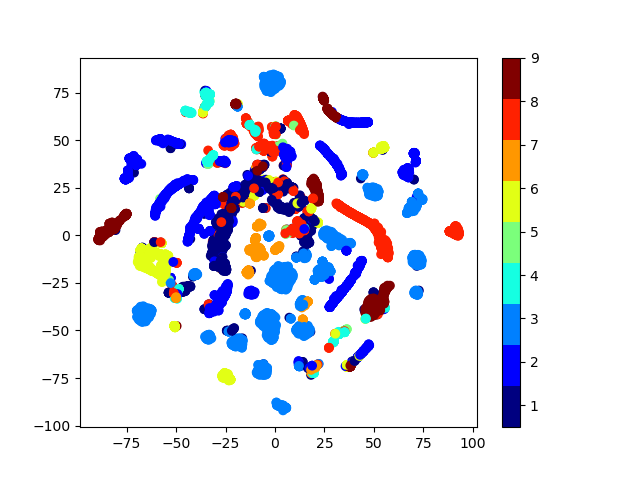

In [ ]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(df_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=asm_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train and test split

In [ ]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [ ]:
print('Number of data points in train data:', X_train_asm.shape[0])
print('Number of data points in test data:', X_test_asm.shape[0])
print('Number of data points in cross validation data:', X_cv_asm.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


In [ ]:
X_train_asm.shape

(6955, 849)

# Machine Learning models on features of .asm files

## 1. K-Nearest Neigbors

log_loss for k =  1 is 0.9334804431057023
log_loss for k =  3 is 0.5691590401234147
log_loss for k =  5 is 0.5464859626249803
log_loss for k =  7 is 0.5402740616244754
log_loss for k =  9 is 0.5332339607039308
log_loss for k =  11 is 0.524863079421664
log_loss for k =  13 is 0.47748702976146
log_loss for k =  15 is 0.44790310181268794
log_loss for k =  17 is 0.4550910955226291
log_loss for k =  19 is 0.44414980571100765


<IPython.core.display.Javascript object>


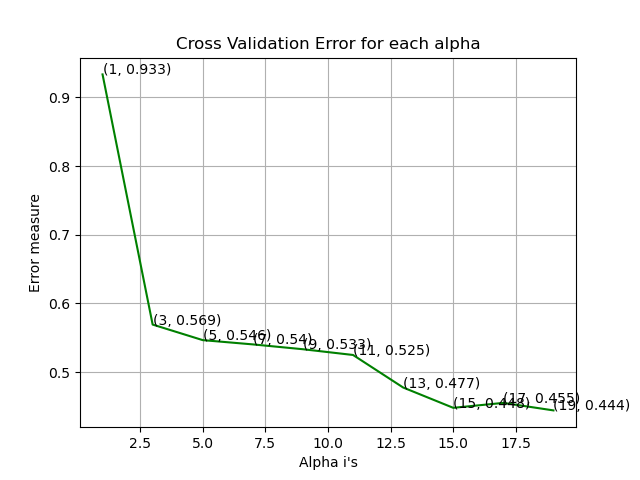

log loss for train data 0.13235272219274993
log loss for cv data 0.44414980571100765
log loss for test data 0.43510344201262763
Number of misclassified points  6.853725850965961
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


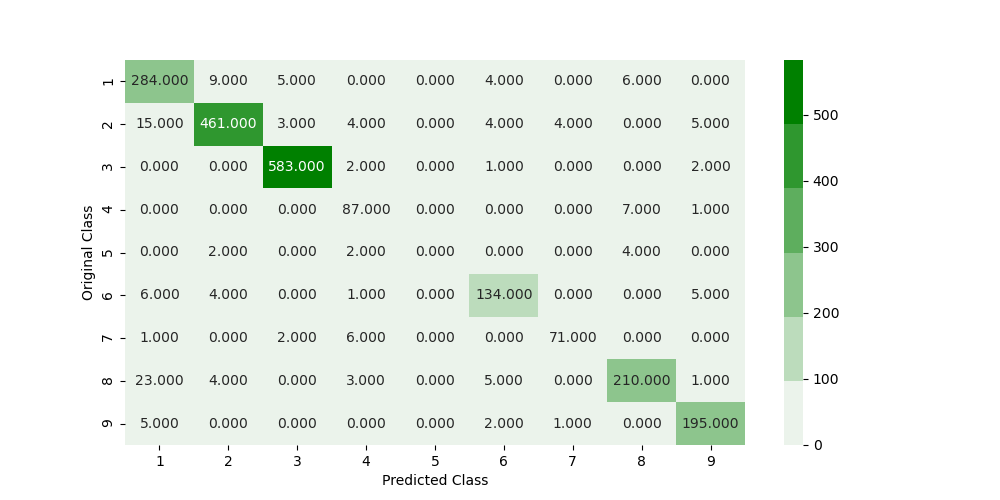

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


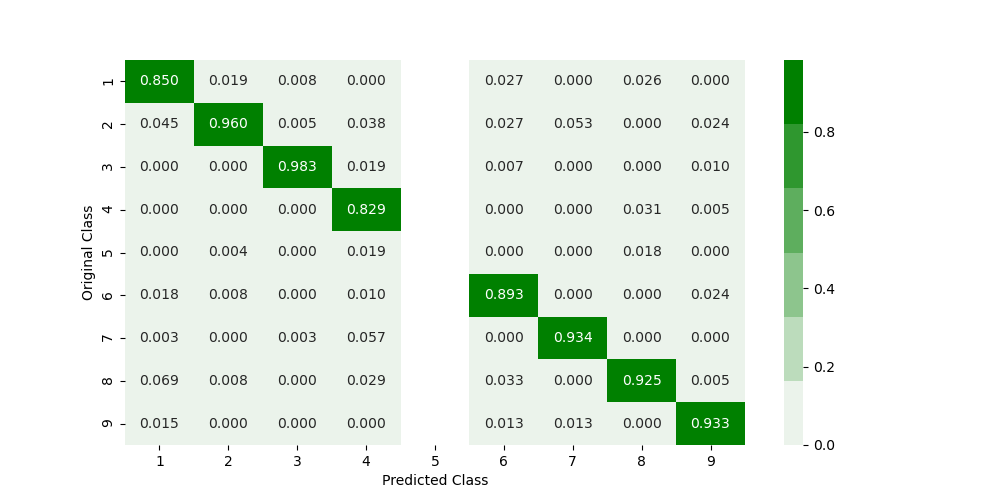

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
#     sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
#     sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = k_cfl.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
# sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
# sig_clf.fit(X_train_asm, y_train_asm)
pred_y=k_cfl.predict(X_test_asm)


predict_y = k_cfl.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = k_cfl.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = k_cfl.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,k_cfl.predict(X_test_asm))

## 2. Logistic Regression

log_loss for c =  1e-05 is 1.5268126455918491
log_loss for c =  0.0001 is 1.5103629116570179
log_loss for c =  0.001 is 1.5159654651636305
log_loss for c =  0.01 is 1.5356540952480093
log_loss for c =  0.1 is 1.5188380917726103
log_loss for c =  1 is 1.5983658293642196
log_loss for c =  10 is 1.558548507761022
log_loss for c =  100 is 1.5700264088678084
log_loss for c =  1000 is 1.5633790056307708


<IPython.core.display.Javascript object>


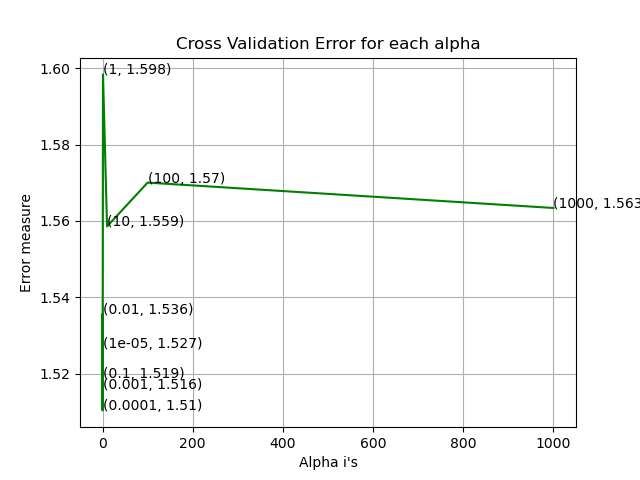

log loss for train data 1.4958662532858171
log loss for cv data 1.5103629116570179
log loss for test data 1.5330088550698862
Number of misclassified points  51.42594296228151
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


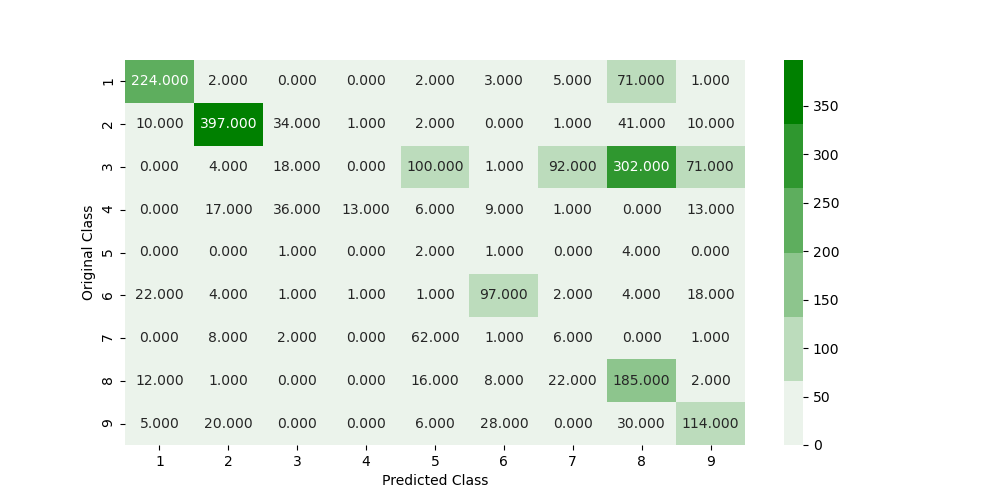

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


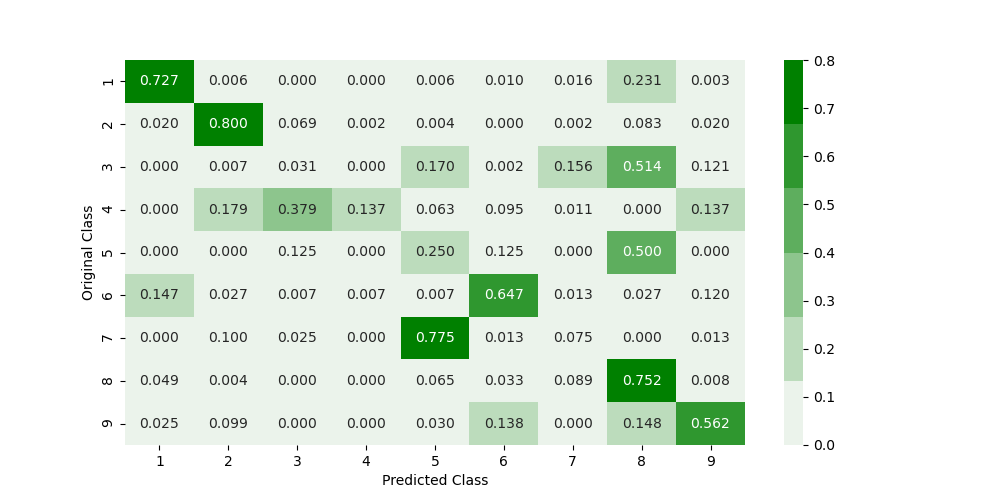

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
#     sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
#     sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = logisticR.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
# sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
# sig_clf.fit(X_train_asm, y_train_asm)

predict_y = logisticR.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = logisticR.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = logisticR.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,logisticR.predict(X_test_asm))

## 3. Random Forest Classifier

log_loss for c =  10 is 0.04137634881679218
log_loss for c =  50 is 0.0392113897167489
log_loss for c =  100 is 0.03893436280532286
log_loss for c =  500 is 0.03828059639825773
log_loss for c =  1000 is 0.03834341596307897
log_loss for c =  2000 is 0.03820596959340149
log_loss for c =  3000 is 0.022926058004369015


<IPython.core.display.Javascript object>


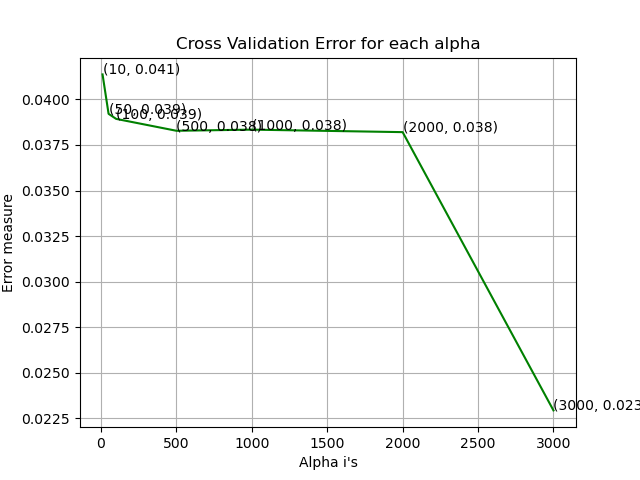

log loss for train data 0.006362269864816386
log loss for cv data 0.022926058004369015
log loss for test data 0.02559256919562592
Number of misclassified points  0.6439742410303588
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
#     sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
#     sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = r_cfl.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
# sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
# sig_clf.fit(X_train_asm, y_train_asm)
predict_y = r_cfl.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=r_cfl.classes_, eps=1e-15)))
predict_y = r_cfl.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15)))
predict_y = r_cfl.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=r_cfl.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,r_cfl.predict(X_test_asm))

## 4.Xgboost Classifier with best hyperparameters

In [ ]:
start=datetime.now()
x_cfl=XGBClassifier(n_estimators=200,subsample=0.5,learning_rate=0.15,colsample_bytree=0.5,max_depth=3)
x_cfl.fit(X_train_asm,y_train_asm)
end=datetime.now()
difference=end-start
print('Time taken to train asm files with XGBClassifier ',difference)
# c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
# c_cfl.fit(X_train_asm,y_train_asm)

Time taken to train asm files with XGBClassifier  0:02:09.153406


In [ ]:
predict_y = x_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = x_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = x_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.0014466675127894765
cv loss 0.010273753656536402
test loss 0.01560496541957888


Number of misclassified points  0.36798528058877644
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


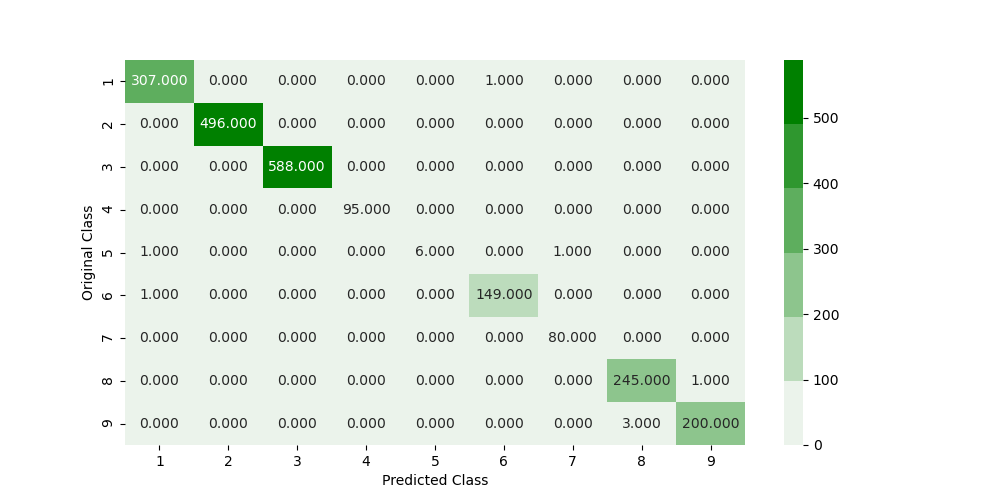

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


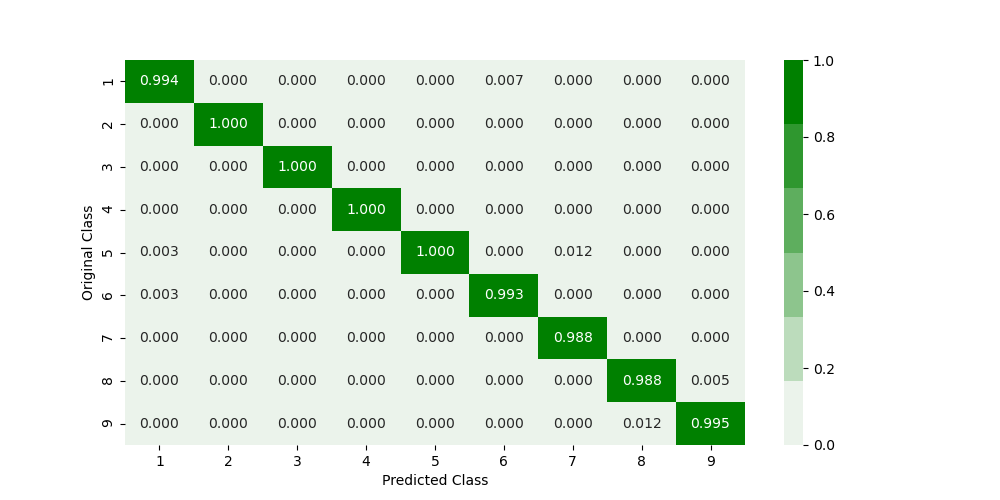

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


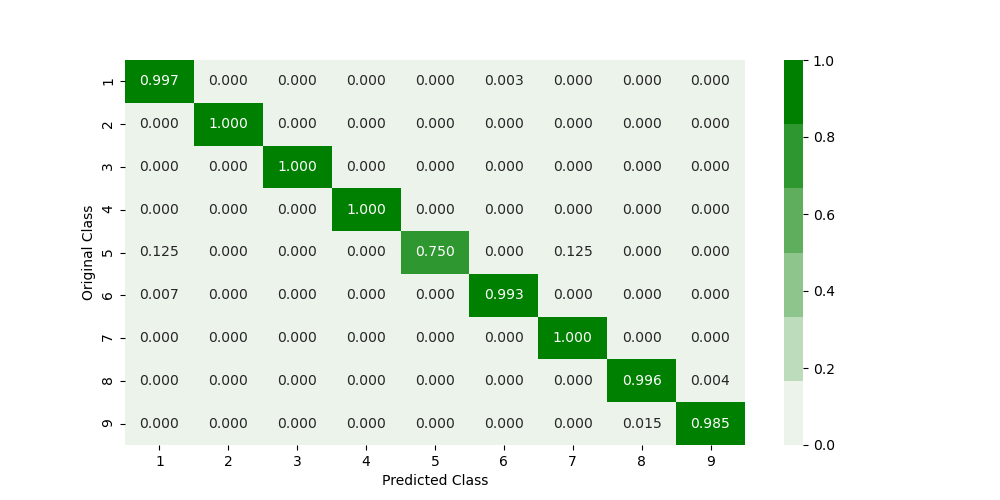

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
plot_confusion_matrix(y_test_asm,x_cfl.predict(X_test_asm))

# Merging both asm and byte file features

In [ ]:
byte_data_norm_c.head()

ID     00 00     00 01     00 02     00 03     00 04  \
0  01azqd4InC7m9JpocGv5  0.396078  0.564706  0.525490  0.552941  0.552941   
1  01IsoiSMh5gxyDYTl4CB  0.690196  0.462745  0.968627  0.843137  0.290196   
2  01jsnpXSAlgw6aPeDxrU  0.725490  0.658824  0.549020  0.521569  0.517647   
3  01kcPWA9K2BOxQeS5Rju  0.450980  0.670588  0.384314  0.274510  0.243137   
4  01SuzwMJEIXsK7A8dQbl  0.984314  0.972549  0.145098  0.909804  0.952941   

      00 05     00 06     00 07     00 08  ...        f9        fa        fb  \
0  0.564706  0.560784  0.545098  0.537255  ...  0.013560  0.013107  0.013634   
1  0.945098  0.031373  0.423529  0.592157  ...  0.001920  0.001147  0.001329   
2  0.509804  0.505882  0.525490  0.537255  ...  0.009804  0.011777  0.012604   
3  0.545098  0.521569  0.513725  0.450980  ...  0.002121  0.001886  0.002272   
4  0.133333  0.909804  0.972549  0.509804  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 2260 columns]

In [ ]:
df_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...    792    793    794   795    796    797  \
0      323        0       3  ...  100.0  101.0  108.0  32.0  102.0  108.0   
1        0        0       3  ...   61.0   61.0   61.0  61.0   61.0   61.0   
2      145        0       3  ...   61.0   61.0   61.0  61.0   61.0   61.0   
3        0        0       3  ...   61.0   61.0   61.0  61.0   61.0   61.0   
4        0        0       3  ...   61.0   61.0   61.0  61.0   61.0   61.0   

    798    799  size_asm  Class  
0  97.0  116.0  0.078190      1  
1  61.0   61.0  0.063400      1  
2  61.0   61.0  0.041695      1  
3  61.0   61.0  0.018757      1  
4  61.0   61.0  0.037567      1  

[5 rows x 854 columns]

In [ ]:
print(byte_data_norm_c.shape)
print(df_asm.shape)

(10868, 2260)
(10868, 854)


In [ ]:
result_x = pd.merge(byte_data_norm_c,df_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

00 00     00 01     00 02     00 03     00 04     00 05     00 06  \
0  0.396078  0.564706  0.525490  0.552941  0.552941  0.564706  0.560784   
1  0.690196  0.462745  0.968627  0.843137  0.290196  0.945098  0.031373   
2  0.725490  0.658824  0.549020  0.521569  0.517647  0.509804  0.505882   
3  0.450980  0.670588  0.384314  0.274510  0.243137  0.545098  0.521569   
4  0.984314  0.972549  0.145098  0.909804  0.952941  0.133333  0.909804   

      00 07     00 08     00 09  ...    791    792    793    794   795    796  \
0  0.545098  0.537255  0.552941  ...   61.0   61.0   61.0   61.0  61.0   61.0   
1  0.423529  0.592157  0.376471  ...   54.0   32.0   40.0   80.0  69.0   41.0   
2  0.525490  0.537255  0.529412  ...   61.0   61.0   61.0   61.0  61.0   61.0   
3  0.513725  0.450980  0.545098  ...  111.0  100.0  101.0  108.0  32.0  102.0   
4  0.972549  0.509804  0.549020  ...   61.0   61.0   61.0   61.0  61.0   61.0   

     797   798    799   size_asm  
0   61.0  61.0   61.0  56.229886  
1   13.0  10.0   46.0  13.999378  
2   61.0  61.0   61.0   8.507785  
3  108.0  97.0  116.0   0.078190  
4   61.0  61.0   61.0   0.996723  

[5 rows x 3107 columns]

## Multivariate Analysis on final fearures

<IPython.core.display.Javascript object>


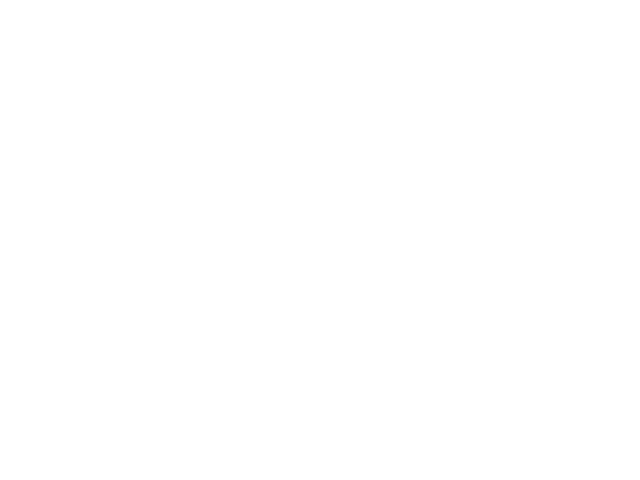

In [ ]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

## Train and Test split

In [ ]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [ ]:
print('Number of data points in train data:', X_train_merge.shape[0])
print('Number of data points in test data:', X_test_merge.shape[0])
print('Number of data points in cross validation data:',X_cv_merge.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


# Machine Learning models on features of both .asm and .bytes files

## 1.Random Forest Classifier on final features

log_loss for c =  10 is 0.07041483776771519
log_loss for c =  50 is 0.03609752856525885
log_loss for c =  100 is 0.03693523693967853
log_loss for c =  500 is 0.03667205776538472
log_loss for c =  1000 is 0.036673330238163056
log_loss for c =  2000 is 0.036889990044518546
log_loss for c =  3000 is 0.03715732328151703
best alpha= 1


<IPython.core.display.Javascript object>


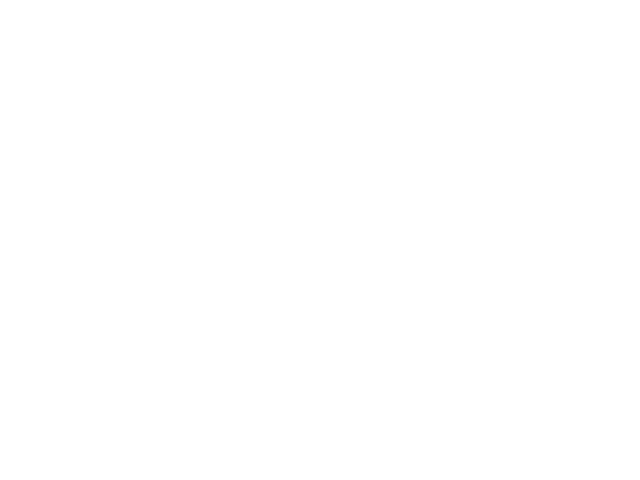

For values of best alpha =  50 The train log loss is: 0.010718823192039142
For values of best alpha =  50 The cross validation log loss is: 0.03609752856525885
For values of best alpha =  50 The test log loss is: 0.05015014042909823
Number of misclassified points  0.6899724011039559
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


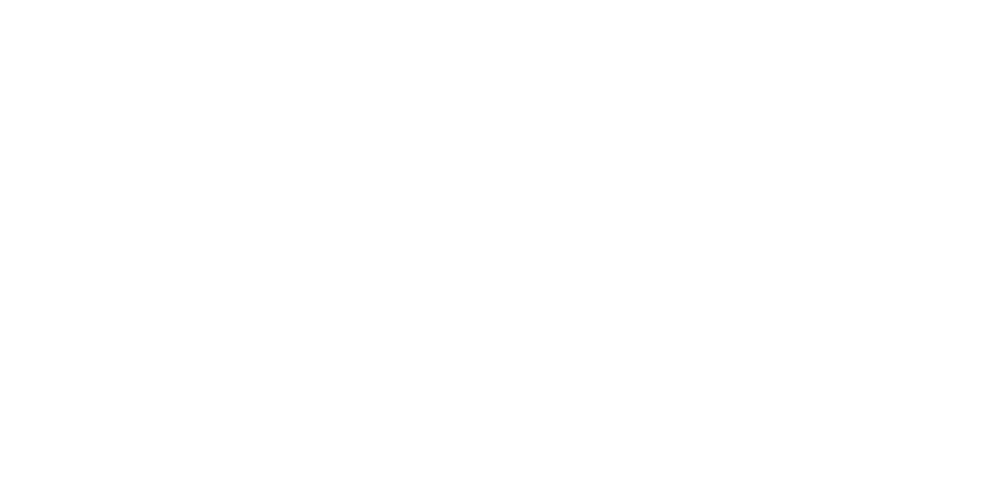

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
#     sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
#     sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = r_cfl.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)
print('best alpha=',best_alpha)
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
# sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
# sig_clf.fit(X_train_merge, y_train_merge)

predict_y = r_cfl.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = r_cfl.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = r_cfl.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,r_cfl.predict(X_test_merge))

## 2. XgBoost Classifier on final features

In [ ]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.1, 0.3, 0.5, 1]},
                   verbose=10)

In [ ]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.1}


In [ ]:
start=datetime.now()
x_cfl=XGBClassifier(n_estimators=1000,max_depth=5,learning_rate=0.1,colsample_bytree=0.1,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
end=datetime.now()
difference=end-start
print('Time taken to train final data with XGBClassifier ',difference)
# sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
# sig_clf.fit(X_train_merge, y_train_merge)
    


Time taken to train final data with XGBClassifier  0:03:02.875842


In [ ]:
joblib.dump(x_cfl,'xgbmodel_final.pkl')

['xgbmodel_final.pkl']

For values of best alpha =  1000 The train log loss is: 0.0005178034989031298
For values of best alpha =  1000 The cross validation log loss is: 0.010053881162574762
For values of best alpha =  1000 The test log loss is: 0.01328992849998576
Number of misclassified points  0.36798528058877644
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


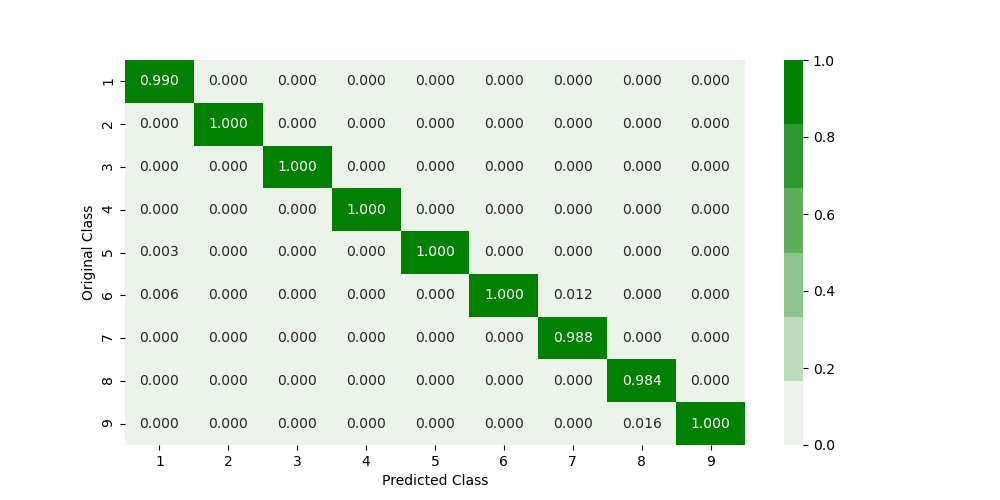

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


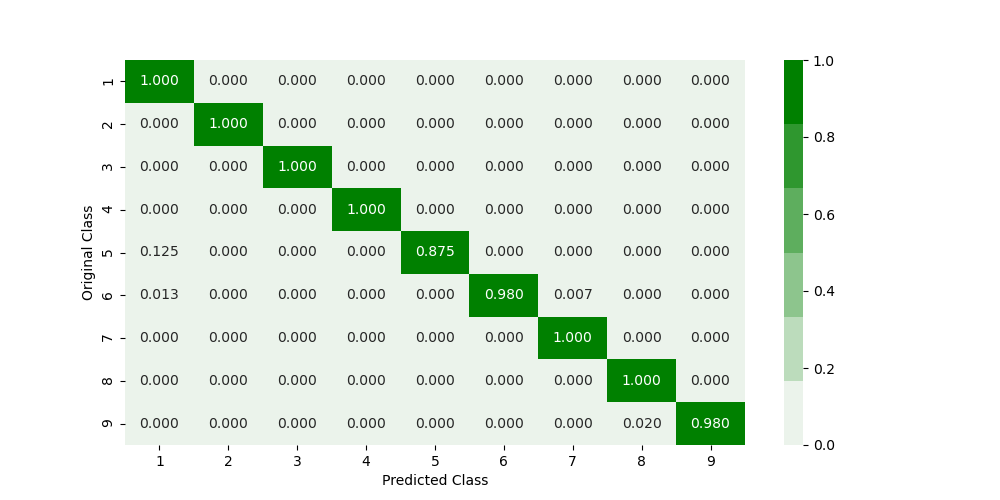

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
predict_y = x_cfl.predict_proba(X_train_merge)
print ('For values of best alpha = ', 1000, "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = x_cfl.predict_proba(X_cv_merge)
print('For values of best alpha = ', 1000, "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = x_cfl.predict_proba(X_test_merge)
print('For values of best alpha = ', 1000, "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,x_cfl.predict(X_test_merge))

# Conclusion:
### 1. Using Google Cloud Platform for working on this assignment.
### 2. Extracting bigrams from bytefiles using CountVectorizer. A total of 66049 bigram vocabulary obtained.
### 3. XGBoost Classifier  perfoms good on unigram-bigram features with a logloss of 0.0289 on test data
### 4. Extracting pixel intensity features from asm files with converting files to images and selecting top 800 features
### 5. XGBoost and Randomforest Classifier perfoms good on all features of asm files with a logloss of 0.01560 and 0.02559  on test data
### 6. Combined features of byte(for final training considering 2000 bigram byte features) and asm files with training on XGBoost and Randomforest Classifier gives a logloss of 0.01328 and 0.05015 on test data
### (Description for each step is given above every code snippet)
